In [15]:
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np

In [16]:
optimized = pd.read_csv('../out/pymol/output_energies_optimized_2g5r_1.csv')['energy']
docked_df = pd.read_csv('../out/pymol/output_energies_docked_2g5r_1.csv')
avg_docked_energy = docked_df.mean(axis=1)
best_docked_energy = docked_df['0']
y = pd.read_csv('../data/test.csv')['G']
merge_df = pd.DataFrame({'avg':avg_docked_energy, 'best':best_docked_energy, 'optimized':optimized, 'y':y})

# df = df[(np.abs(st.zscore(df)) < 3).all(axis=1)]
# df2 = df.drop(['y'], axis=1)
# y = list(df['y'])

In [17]:
merge_df.head()

,avg,best,optimized,y
0,-6.600857,-7.391,-0.371,165
1,-4.964905,-5.554,-0.561,16
2,-6.115810,-7.386,341.945,1330
3,-5.509238,-6.781,0.000,1301
4,-5.793429,-7.301,-2.051,17


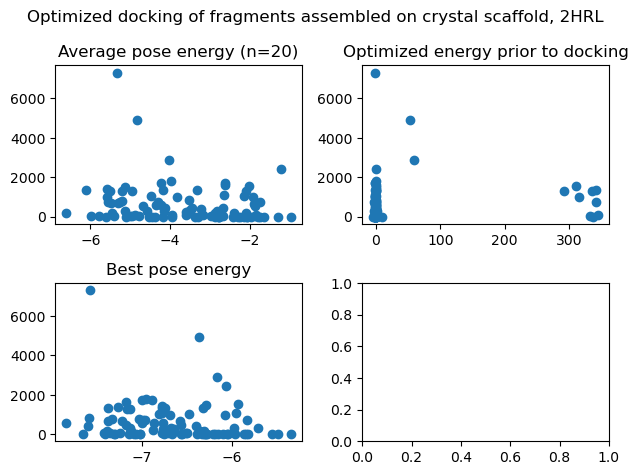

In [18]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Optimized docking of fragments assembled on crystal scaffold, 2HRL')
axs[0, 0].scatter(merge_df['avg'], merge_df['y'])
axs[0, 0].set_title("Average pose energy (n=20)")
axs[1, 0].scatter(merge_df['best'], merge_df['y'])
axs[1, 0].set_title("Best pose energy")
axs[0, 1].scatter(merge_df['optimized'], merge_df['y'])
axs[0, 1].set_title("Optimized energy prior to docking")
fig.tight_layout()



In [19]:
r, p = st.pearsonr(merge_df['avg'], merge_df['y'])
print(f"Average docking energy vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")

r, p = st.pearsonr(merge_df['best'], merge_df['y'])
print(f"Best docking energy vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")

r, p = st.pearsonr(merge_df['optimized'], merge_df['y'])
print(f"Optimized energy vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")


Average docking energy vs. experimental affinity
correlation: -0.1856756497665529
P-value:        0.07317776210693339
R squared:    0.03447544691623162
Best docking energy vs. experimental affinity
correlation: -0.14071662983777655
P-value:        0.17612407879886405
R squared:    0.019801169912901827
Optimized energy vs. experimental affinity
correlation: 0.09293240204861597
P-value:        0.3729895002664557
R squared:    0.008636431350525602
